# Цель работы:
- Изучить такие методы оптимизации как метод деления отрезка пополам и метод золотого сечения
- Решить задачу, используя эти методы
- Сформировать таблицу исследований по каждому методу(длину интервала, границы интервала на каждой итерации) и соотношение длины интервала нынешний и предыдущий итерации 
- Вывести график зависимости количества вычислений целевой функции от логарифма точности $\epsilon$
- Сделать выводы







# 1. Метод деления отрезка попoлам 

## 1.1. Разбор примера из методички 
### 1.1.1. Вызов необходимых библиотек 

In [1]:
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
matplotlib.style.use('ggplot')
%matplotlib inline

### 1.1.2. Задание стартовых значений для:
* отрезка неопределенности
* точности 
* шага итерации 

In [2]:
a0 = 0
b0 = 10
e = 1
k = 0

### 1.1.3. Задание функции

In [3]:
def f(x):
    return 2*x**2 - 12*x

In [4]:
ak = a0
bk = b0

### 1.1.4. Осуществление алгоритма со всеми шагами 

In [5]:
xk = (ak+bk)/2
IL = bk - ak
while IL >= e:
    yk = ak + IL/4
    zk = bk - IL/4
    if f(xk)>f(yk):
        k = k+1
        bk = xk
        ak = ak
        xk = yk
        IL = bk - ak
    else:
        k = k+1
        if f(xk)>f(zk):
            ak = xk
            xk = zk            
        else:
            ak = yk
            bk = zk
        IL = bk - ak
xopt = (ak+bk)/2
print('Точка х* :', xopt)
print('f(x*):',f(xopt))

Точка х* : 3.125
f(x*): -17.96875


<b> Прежде чем перейти к непосредственному решению примера, оформим алгоритм в виде функции. 
На вход функции будем подавать следующие параметры:
- отрезок неопределенности с параметрами $ a_0 $ и $ b_0 $
- точность $\epsilon>0$
- функцию $f(x)$
    
  Также добавим массивы - накопители, чтобы вывести финальные таблички c длинами отрезка, границами отрезка и.т.д.
</b>

In [6]:
def bisection_method(a0,b0,e,f):
    ak = a0
    bk = b0
    xk = (ak+bk)/2
    IL = bk - ak
    k = 0
    a = []
    b = []
    Length = []
    a.append(ak)
    b.append(bk)
    Length.append(IL)
    while IL >= e:
        yk = ak + IL/4
        zk = bk - IL/4
        if f(xk)>f(yk):
            bk = xk
            xk = yk
            IL = abs(bk - ak)
            a.append(ak)
            b.append(bk)
            Length.append(IL)
            k = k+2
        else:
            if f(xk)>f(zk):
                ak = xk
                xk = zk
                a.append(ak)
                b.append(bk)
            else:
                ak = yk
                bk = zk
                a.append(ak)
                b.append(bk)
            IL = abs(bk - ak)
            Length.append(IL)
            k = k+2
    xopt = (ak+bk)/2
    return xopt,k,a,b,Length

In [7]:
xmin,k,a1,b1,Length1 = bisection_method(a0,b0,e,f)
print('Точка х* :', xmin)
print('f(x*):',f(xmin))
print('Количество вычислений функций:',k)

Точка х* : 3.125
f(x*): -17.96875
Количество вычислений функций: 8


## 1.2. Решение примера 

<b> Мой пример задан номером 12
    
   $f(x) = xe^x \rightarrow min  , x\in [-2,0] $

   
</b>

### 1.2.1. Задание стартовых значений для:
* отрезка неопределенности
* точности 

Для точности сформируем отдельный массив значений, чтобы потом построить график зависимости количества пересчета целевой функции от логарифма задаваемой точности $\epsilon $

In [8]:
a0 = -2
b0 = 0
eps = [i/100000 for i in range(1,200000)]

### 1.2.2. Задание целевой функции

In [9]:
def cf(x):
    return x*math.exp(x)


### 1.2.3. Решение задачи:
Для опреденности выберем $\epsilon = 0.03$

In [10]:
eps1 = 0.03
xnew,k2,a2,b2,Length2 = bisection_method(a0,b0,eps1,cf)
print('Точка х* :', xnew)
print('f(x*):',cf(xnew))


Точка х* : -1.0
f(x*): -0.36787944117144233


### 1.2.4. Создание таблицы с данными

In [11]:
data = {'Левая граница интервалов':a2 ,'Правая граница интервалов':b2, 'Длина интервала(М1)':Length2} 

df = pd.DataFrame(data)

In [12]:

def Add(row):
    s = '[' + str(row['Левая граница интервалов'])+';'+str(row['Правая граница интервалов'])+']'
    return s
df['Границы'] = df.apply (lambda row: Add(row), axis=1)

In [13]:
df = df[['Границы','Длина интервала(М1)']]
for i in range(1, len(df['Длина интервала(М1)'])):
    df['Соотношение интервалов']=df['Длина интервала(М1)'].loc[i]/df['Длина интервала(М1)'].loc[i-1] 
df.head(df.shape[0])

,Границы,Длина интервала(М1),Соотношение интервалов
0,[-2.0;0.0],2.000000,0.5
1,[-1.5;-0.5],1.000000,0.5
2,[-1.25;-0.75],0.500000,0.5
3,[-1.125;-0.875],0.250000,0.5
4,[-1.0625;-0.9375],0.125000,0.5
5,[-1.03125;-0.96875],0.062500,0.5
6,[-1.015625;-0.984375],0.031250,0.5
7,[-1.0078125;-0.9921875],0.015625,0.5


### 1.2.5. Построение графика зависимости количества пересчета целевой функции от логарифма задаваемой точности $\epsilon $

No handles with labels found to put in legend.


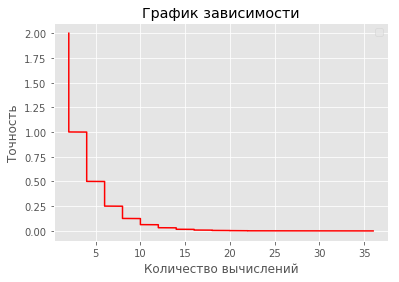

In [14]:
count = []
for each_eps in eps:
    xnew,k,a,b,Length = bisection_method(a0,b0,each_eps,cf)
    count.append(k)
plt.plot(count, eps ,'r')
plt.title('График зависимости')
plt.xlabel('Количество вычислений')
plt.ylabel('Точность')
plt.legend(loc='best')

No handles with labels found to put in legend.


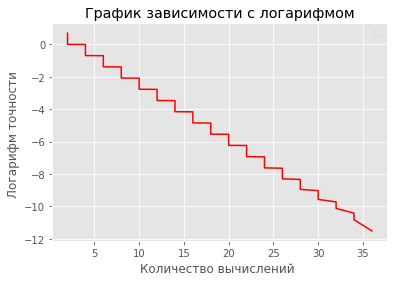

In [15]:
plt.plot(count,np.log(eps),'r')
plt.title('График зависимости с логарифмом')
plt.xlabel('Количество вычислений ')
plt.ylabel('Логарифм точности ')
plt.legend(loc='best')

# 2. Метод золотого сечения

## 2.1. Разбор примера из методички 

### 2.1.1. Задание стартовых значений для:
* отрезка неопределенности
* точности 
* шага итерации 

In [16]:
a0 = 0
b0 = 0.5
e = 0.15
k = 0

### 2.1.2. Задание функции

In [17]:
def f(x):
    return (127/4)*(x**2) - (61/4)*x+2

### 2.1.3. Осуществление алгоритма со всеми шагами 

In [18]:
ak = a0
bk = b0
yk = ak+0.382*(bk-ak)
zk = ak+0.618*(bk-ak)
IL = abs(bk-ak)
while IL>=e:
    if f(yk)<=f(zk):
        bk = zk
        zk = yk
        yk = ak+0.382*(bk-ak)
        IL = abs(bk-ak)
    else:
        ak = yk
        ynew = zk
        zk = ak+0.618*(bk-ak)
        yk = ynew
        IL = abs(bk-ak)
xopt = (ak+bk)/2
print('Точка x* :',round(xopt,3))
print('f(x*):',f(xopt))
        

Точка x* : 0.25
f(x*): 0.171875


<b> Прежде чем перейти к непосредственному решению примера, оформим алгоритм в виде функции. 
На вход функции будем подавать следующие параметры:
- отрезок неопределенности с параметрами $ a_0 $ и $ b_0 $
- точность $\epsilon>0$
- функцию $f(x)$
    
  Также добавим массивы - накопители, чтобы вывести финальные таблички c длинами отрезка, границами отрезка и.т.д.
</b>

In [19]:
def Golden_section(a0,b0,e,f):
    ak = a0
    bk = b0
    yk = ak+0.382*(bk-ak)
    zk = ak+0.618*(bk-ak)
    IL = abs(bk-ak)
    a=[]
    b=[]
    Length=[]
    k = 0
    while IL>=e:
        if f(yk)<=f(zk):
            bk = zk
            zk = yk
            yk = ak+0.382*(bk-ak)
            IL = abs(bk-ak)
            k=k+1
            ak = round(ak,3)
            a.append(ak)
            b.append(bk)
            Length.append(IL)
        else:
            ak = yk
            ynew = zk
            zk = ak+0.618*(bk-ak)
            yk = ynew
            IL = abs(bk-ak)
            k = k+1
            a.append(ak)
            b.append(bk)
            Length.append(IL)
    xopt = (ak+bk)/2
    return xopt,k+1,a,b,Length

In [20]:
xmin,k1,a1,b1,Length1 = Golden_section(a0,b0,e,f)
print('Точка х* :', round(xmin,3))
print('f(x*):',f(xmin))
print('Количество вычислений функций:',k1)

Точка х* : 0.25
f(x*): 0.171875
Количество вычислений функций: 4


## 2.2. Решение примера 

<b> Мой пример задан номером 12
    
   $f(x) = xe^x \rightarrow min  , x\in [-2,0] $

   
</b>

### 2.2.1. Задание стартовых значений для:
* отрезка неопределенности
* точности 

Для точности сформируем отдельный массив значений, чтобы потом построить график зависимости количества пересчета целевой функции от логарифма задаваемой точности $\epsilon $

In [21]:
a0 = -2
b0 = 0
eps = [i/100000 for i in range(1,200000)]

### 2.2.2. Задание целевой функции

In [22]:
def cf(x):
    return x*math.exp(x)


### 2.2.3. Решение задачи:
Для опреденности выберем $\epsilon = 0.03$

In [23]:
eps1 = 0.03
xmin,k1,a1,b1,Length1 = Golden_section(a0,b0,eps1,cf)
print('Точка х* :',round(xmin,3))
print('f(x*):',cf(xmin))

Точка х* : -1.0
f(x*): -0.36787944101647213


### 2.2.4. Создание таблицы с данными

In [24]:
data1 = {'Левая граница интервалов':a1 ,'Правая граница интервалов':b1, 'Длина интервала(М2)':Length1} 

df1 = pd.DataFrame(data1)

In [25]:
def Add(row):
    s = '[' + str(row['Левая граница интервалов'])+';'+str(row['Правая граница интервалов'])+']'
    return s
df1['Границы'] = df1.apply (lambda row: Add(row), axis=1)

In [26]:
df1 = df1[['Границы','Длина интервала(М2)']]
for i in range(1, len(df1['Длина интервала(М2)'])):
    df1['Соотношение интервалов']=df1['Длина интервала(М2)'].loc[i]/df1['Длина интервала(М2)'].loc[i-1] 
df1.head(df1.shape[0])


,Границы,Длина интервала(М2),Соотношение интервалов
0,[-2.0;-0.764],1.236000,0.617081
1,[-1.527848;-0.764],0.763848,0.617081
2,[-1.236;-0.764],0.472000,0.617081
3,[-1.236;-0.944304],0.291696,0.617081
4,[-1.124572128;-0.944304],0.180268,0.617081
5,[-1.055789936;-0.944304],0.111486,0.617081
6,[-1.056;-0.986891627552],0.068898,0.617081
7,[-1.029470782172864;-0.986891627552],0.042579,0.617081
8,[-1.013166424896;-0.986891627552],0.026275,0.617081


### 2.2.5. Построение графика зависимости количества пересчета целевой функции от логарифма задаваемой точности $\epsilon $

No handles with labels found to put in legend.


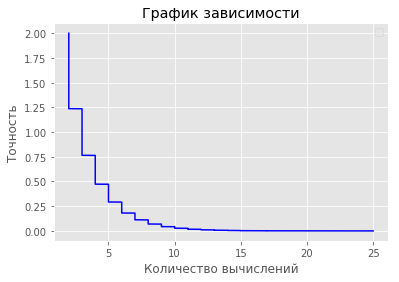

In [27]:
count = []
for each_eps in eps:
    xnew,k,a,b,Length = Golden_section(a0,b0,each_eps,cf)
    count.append(k)
plt.plot(count, eps ,'b')
plt.title('График зависимости')
plt.xlabel('Количество вычислений')
plt.ylabel('Точность')
plt.legend(loc='best')

No handles with labels found to put in legend.


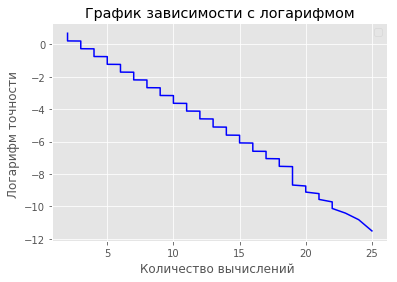

In [28]:
plt.plot(count,np.log(eps),'b')
plt.title('График зависимости с логарифмом')
plt.xlabel('Количество вычислений ')
plt.ylabel('Логарифм точности ')
plt.legend(loc='best')


# Выводы:
Итак, изучив данные методы оптимизации(реализовав их алгоритм) и построив различные графики, можно сделать следующие выводы:
 1. Оба метода успешно справляются с поиском минимума для такой "незамысловатой" функции, однако методу золотого сечения понадобилось больше итераций, чтобы найти точку минимума.
 2. Также входе исследований можно заметить, что для лучшей "сходимости" методу золотого сечения нужна более высокая точность. Например, при $\epsilon = 0.1 $ алгоритм деления отрезка пополам нашел точку минимума $X_{min} = 1 $, в то время как при этой же точности алгоритм золотого сечения сошелся в точке $X_{min} = 1.02$. Это в том числе связано с округлением и грубостью вычислений точки как середины отрезка.
 3. Соотношение длин интервала в обоих методах происходит пропорцианально(что обусловлено методами), однако в случае метода деления отрезка пополам коэффициент соотношения длины $ \frac{L_{i-1}}{L_{i}} = 0.5$, в методе золотого сечения этот коэффициент  $\approx  0.618$
 4. Графики зависимости количества вычислений функции от логарифма точности $\epsilon > 0$ являются "практически" линейными, что говорит о наличии близкой к экспоненциальной зависимости точности от количества вычислений.(о чем указывают другие построенные графики)
